1/19/2018 ML Project(Updated) (1)\
Predicting players rating\
In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.\
The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more
than 10,000 players for European professional soccer seasons from 2008 to 2016.\
Download the data in the same folder and run the following commmand to get it in the environment

About the Dataset\
The ultimate Soccer database for data analysis and machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.\
+25,000 matches\
+10,000 players\
11 European Countries with their lead championship Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including
the weekly updates\
Team line up with squad formation (X, Y coordinates)\
Betting odds from up to 10 providers\
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for
+10,000 matches\
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA
video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.
Python skills required to complete this project 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SQL:\
The data is in SQL database so students need to retrive using query language. They also need
to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 1/4\
1/19/2018 ML Project(Updated) (1)\
SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards. To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements.\
Pandas:\
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use
data structures and data analysis tools for the Python programming language. Python with
Pandas is used in a wide range of fields including academic and commercial domains including
finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python Pandas and how to use them in practice.\
Scikit Learn:\
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a
consistent interface in Python. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:\
NumPy: Base n-dimensional array package\
SciPy: Fundamental library for scientific computing\
Matplotlib: Comprehensive 2D/3D plotting\
IPython: Enhanced interactive console\
Sympy: Symbolic mathematics\
Pandas: Data structures and analysis\
Extensions or modules for SciPy care conventionally named SciKits. As such, the module
provides learning algorithms and is named scikit-learn. The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.
Machine Learning skills required to complete the project

Supervised learning\
Supervised learning deals with learning a function from available training data. A supervised
learning algorithm analyzes the training data and produces an inferred function, which can be
used for mapping new examples.\
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4
1/19/2018 ML Project(Updated) (1)\
Regression:\
Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions
(discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results.\
Model evaluation:\
Student must know how to judge a model on unseen data. What metric to select to judge
the performance.\

Let's get started.....\
Import Libraries\
import sqlite3\
import pandas as pd\
from sklearn.tree import DecisionTreeRegressor\
from sklearn.linear_model import LinearRegression\
from sklearn.model_selection import train_test_split\
from sklearn.metrics import mean_squared_error\
from math import sqrt

Read Data from the Database into pandas\
In [2]: # Create your connection.\
cnx = sqlite3.connect('database.sqlite')\
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

### The ultimate soccer database for Data Analysis and Machine Learning

In [2]:
#IMPORTING THE LIBRARIES
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sql = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/database.sqlite')

##### Showing tables using SQL statement:
##### To list all tables in a database is to query them from the sqlite_master table.

In [4]:
db = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", sql)
db

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [5]:
#we require players ratings dataset for the project
df = pd.read_sql_query("SELECT * FROM Player_Attributes", sql)
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


**from the above dataset, "overall_rating" is the output dependent feature**

#### Data Cleaning

In [6]:
print(df.shape)
print(df.dtypes)
print(df.columns)

(183978, 42)
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            flo

### EDA-Feature Engineering: Taking care of missing values and Handling Categorical Features

In [7]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, df[feature].isnull().sum())

overall_rating 836
potential 836
preferred_foot 836
attacking_work_rate 3230
defensive_work_rate 836
crossing 836
finishing 836
heading_accuracy 836
short_passing 836
volleys 2713
dribbling 836
curve 2713
free_kick_accuracy 836
long_passing 836
ball_control 836
acceleration 836
sprint_speed 836
agility 2713
reactions 836
balance 2713
shot_power 836
jumping 2713
stamina 836
strength 836
long_shots 836
aggression 836
interceptions 836
positioning 836
vision 2713
penalties 836
marking 836
standing_tackle 836
sliding_tackle 2713
gk_diving 836
gk_handling 836
gk_kicking 836
gk_positioning 836
gk_reflexes 836


##### There is a lot of NAN values in most of the features within the dataset. But, befor handling these missing values, let's look at "attacking_work_rate" and "defensive_work_rate" features as they have many records that need to be dropped because of non-uniformity in their levels.

In [8]:
df.drop(labels=["id","player_fifa_api_id","player_api_id", "date"], axis=1, inplace=True)
df.head()#drop columns as they are just ids and don't add any extra information to our model

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
print("The OG shape of the dataset is", df.shape)

The OG shape of the dataset is (183978, 38)


In [10]:
#Categorical Features - attacking work rate and defensive work rate

print(df.attacking_work_rate.unique())
print(df.defensive_work_rate.unique())

['medium' 'high' None 'low' 'None' 'le' 'norm' 'stoc' 'y']
['medium' 'high' 'low' '_0' None '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']


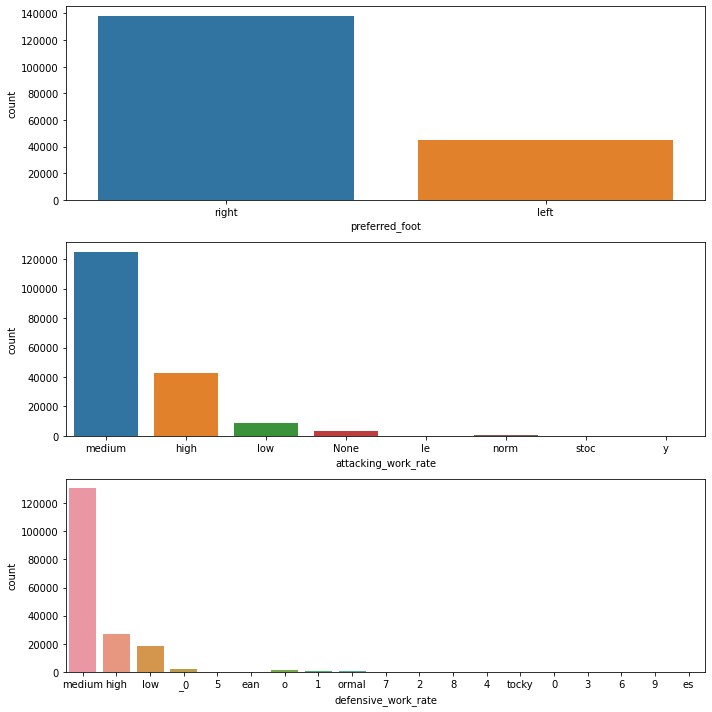

In [11]:
fig3, ax3 = plt.subplots(nrows = 3, ncols = 1)
fig3.set_size_inches(10,10)
sns.countplot(x = df['preferred_foot'],ax = ax3[0])
sns.countplot(x = df['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = df['defensive_work_rate'], ax=ax3[2])
fig3.tight_layout()

**The levels for both the attacking_work_rate and defensive_work_rate cateorical features should be 'low', 'medium', and 'high'. Note that they also account for the majority of instances. The remaining of the levels do not make sense so remove the instances that contain them.**

In [12]:
df = df.loc[(df['attacking_work_rate'].isin(['medium','high','low'])\
                       & df['defensive_work_rate'].isin(['medium','high','low'])),:]
print(df.shape)

(176161, 38)


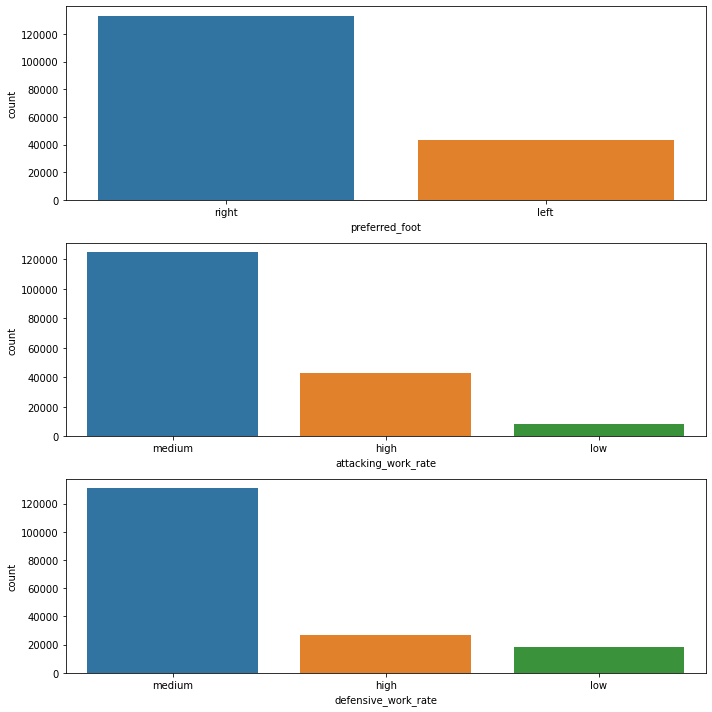

In [13]:
fig3, ax3 = plt.subplots(nrows = 3, ncols = 1)
fig3.set_size_inches(10,10)
sns.countplot(x = df['preferred_foot'],ax = ax3[0])
sns.countplot(x = df['attacking_work_rate'],ax = ax3[1])
sns.countplot(x = df['defensive_work_rate'], ax=ax3[2])
fig3.tight_layout()

In [14]:
print("The new transformed dataset shape is", df.shape)

The new transformed dataset shape is (176161, 38)


**While handling attacking_work_rate and defensive_work_rate features, all the missing values have been taken care of**

## Encoding Categorical Features

"preferred_foot", "attacking_work_rate", "defensive_work_rate" are the categorical features

for **preferred_foot**

In [15]:
df["preferred_foot"].unique()

array(['right', 'left'], dtype=object)

In [16]:
preferred_foot=pd.get_dummies(pd.get_dummies(df["preferred_foot"]), drop_first=True)
df=df.join(preferred_foot)
df.drop(labels=["preferred_foot", "left"], axis=1, inplace=True)

In [17]:
df.head()

,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,right
0,67.0,71.0,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
1,67.0,71.0,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,66.0,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,65.0,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
4,61.0,65.0,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1


In [18]:
df.right.value_counts()

1    133102
0     43059
Name: right, dtype: int64

for **attacking_work_rate**

In [19]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [20]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in the column 
df['attacking_work_rate']= label_encoder.fit_transform(df['attacking_work_rate']) 
  
df['attacking_work_rate'].unique() 

array([2, 0, 1])

for **defensive_work_rate**

In [21]:
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [22]:
df['defensive_work_rate']= label_encoder.fit_transform(df['defensive_work_rate']) 
  
df['defensive_work_rate'].unique()

array([2, 0, 1])

In [23]:
df.head()

,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,right
0,67.0,71.0,2,2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
1,67.0,71.0,2,2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,66.0,2,2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,65.0,2,2,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
4,61.0,65.0,2,2,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1


## Model Training

**Tree based ensemble techniques are not sensitive to ouliers. Here, I am going to use ADABOOST, RANDOM FOREST, and XGBOOST algorithms**

In [24]:
print(df.shape)
X=df.copy()
X.drop(labels=["overall_rating"], axis=1, inplace=True)
print(X.shape)

(176161, 38)
(176161, 37)


In [25]:
y=df["overall_rating"]
y.shape

(176161,)

**Robust Scaler: to handle outliers efficiently**\
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [26]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_robust_scaler=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_robust_scaler.head()

,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,right
0,-0.333333,0.0,0.0,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571,0.0
1,-0.333333,0.0,0.0,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,0.318182,0.400000,-0.625000,-0.30,-0.409091,0.365854,0.325,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571,0.0
2,-0.888889,0.0,0.0,-0.434783,-0.290323,0.578947,-0.266667,-0.285714,-0.65,-0.423077,-0.392857,0.277778,-1.285714,-0.5625,-0.333333,-0.529412,-1.666667,-0.125,-0.578947,-0.714286,-1.0,0.4375,-0.884615,-0.045455,-0.428571,-0.625000,-0.30,-0.409091,0.365854,0.250,0.380952,-0.666667,0.000000,-0.142857,-0.428571,-0.428571,0.0
3,-1.000000,0.0,0.0,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.0,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429,0.0
4,-1.000000,0.0,0.0,-0.478261,-0.322581,0.526316,-0.333333,-0.321429,-0.70,-0.461538,-0.428571,0.222222,-1.357143,-0.5625,-0.333333,-0.529412,-1.750000,-0.125,-0.631579,-0.714286,-1.0,0.4375,-0.923077,-0.090909,-0.457143,-0.666667,-0.35,-0.454545,0.292683,0.175,0.309524,-0.833333,-0.142857,-0.285714,-0.571429,-0.571429,0.0


In [27]:
X=X.values
y-y.values

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
183973    0.0
183974    0.0
183975    0.0
183976    0.0
183977    0.0
Name: overall_rating, Length: 176161, dtype: float64

In [28]:
#TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
#!pip install xgboost

In [30]:
#model building libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
kfold = StratifiedKFold(n_splits=8)

Adaboost r2 Score on Training set is 80.7
Adaboost r2 Score on Test Set is 80.59


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[0.81096986 0.79830722 0.79517757 0.82077688 0.80870532 0.82001573
 0.81657847 0.8175612 ]
Accuracy: 81.10 %
Standard Deviation: 0.91 %
Mean Absolute Error: 2.539264073077149
Mean Squared Error: 9.617683840789404
RMSE: 3.1012390815268343


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


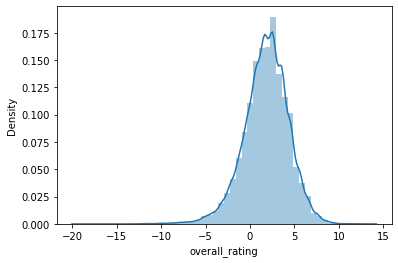

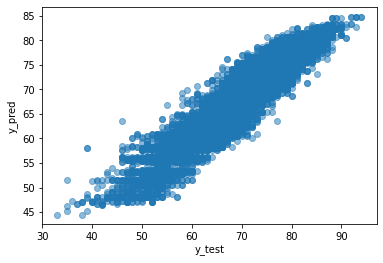

In [31]:
adaboost= AdaBoostRegressor(random_state=0)
adaboost.fit(X_train, y_train)
y_pred=adaboost.predict(X_test)

print("Adaboost r2 Score on Training set is",round(adaboost.score(X_train, y_train)*100,2))
print("Adaboost r2 Score on Test Set is",round(adaboost.score(X_test, y_test)*100,2))

accuracies = cross_val_score(adaboost, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Random Forest r2 Score on Training set is 99.72
Random Forest r2 Score on Test Set is 98.26


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[0.98070465 0.97984719 0.98153912 0.98075626 0.98144316 0.98063153
 0.98103319 0.98144526]
Accuracy: 98.09 %
Standard Deviation: 0.05 %
Mean Absolute Error: 0.4997487122975192
Mean Squared Error: 0.8628267023633679
RMSE: 0.9288846550370868


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


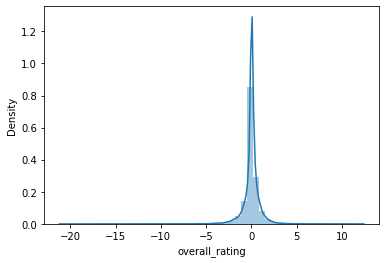

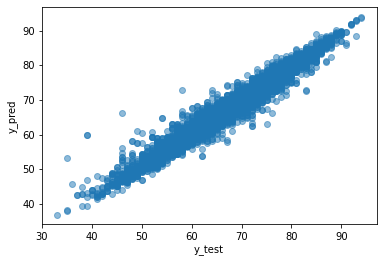

In [32]:
rf_reg = RandomForestRegressor(random_state = 0)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest r2 Score on Training set is",round(rf_reg.score(X_train, y_train)*100,2))
print("Random Forest r2 Score on Test Set is",round(rf_reg.score(X_test, y_test)*100,2))

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

[09:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor r2 Score on Training set is 93.92
XGBRegressor r2 Score on Test Set is 93.64


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


[09:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


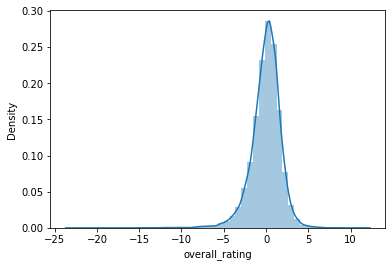

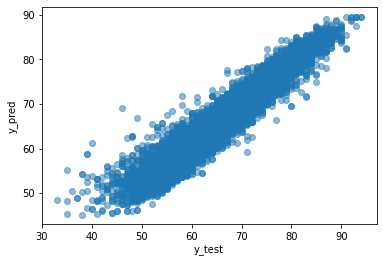

In [33]:
xgb = XGBRegressor(random_state =0)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

print("XGBRegressor r2 Score on Training set is",round(xgb.score(X_train, y_train)*100,2))
print("XGBRegressor r2 Score on Test Set is",round(xgb.score(X_test, y_test)*100,2))

accuracies = cross_val_score(xgb, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

**From the above ensemble techniques, XGBRegressor and Random Forest Regressor perform exceptionally well. Random Forest, a bagging algorithm takes the most time out of the three to execute but even without Hyperparameter Optimzation (in it's default parameters state), it performs better than XGBoost.**

##### Since, our XGBoost and Random Forest models are performing well., we can choose any out of the two models to predict the player's Overall Rating.

Scope:
1. Perform Feature Engineering Dimensionality Reduction.
2. Perform Hyperparameter Optimization for both XGB and Random Forest to increase model performance and accuracy (though this would take quite a lot of time even on cloud based GPUs).
3. Solve the problem statemenr with ANN.